In [1]:
import torch
from models import VariationalNetwork
import matplotlib.pyplot as plt
import numpy as np

# Visualizing learnt kernel

In [2]:
varnet = VariationalNetwork(activation='rbf',features_out=48)
varnet.load_state_dict(torch.load('trained_model/varnet_coronal_pd_fs.h5'))

<All keys matched successfully>

In [3]:
print(varnet.state_dict())

OrderedDict([('cell_list.0.conv_kernel', tensor([[[[[ 2.1129e-01,  2.3636e-02],
           [ 1.4166e-01,  1.6005e-01],
           [ 3.8495e-02, -3.6210e-02],
           ...,
           [ 2.5433e-02, -5.1799e-03],
           [ 2.8072e-02,  3.0871e-02],
           [ 5.3692e-02,  9.3791e-03]],

          [[ 2.9691e-02,  1.2849e-01],
           [ 7.6176e-02,  5.5574e-02],
           [ 5.0571e-02,  4.8842e-02],
           ...,
           [-8.1679e-02,  2.9060e-02],
           [-6.8503e-03, -2.4951e-02],
           [ 4.7664e-02, -3.6216e-02]],

          [[-1.0399e-02, -4.5328e-02],
           [ 1.8508e-01, -4.3819e-02],
           [-6.8512e-02, -6.2895e-02],
           ...,
           [ 1.5943e-02,  1.0290e-02],
           [-4.1625e-02, -7.4196e-03],
           [-1.1484e-01,  2.1571e-02]],

          ...,

          [[ 7.8209e-02,  8.9284e-02],
           [-3.2918e-02,  9.2274e-02],
           [ 9.6616e-02,  1.5529e-01],
           ...,
           [ 9.9312e-02, -2.3045e-02],
           [ 3.

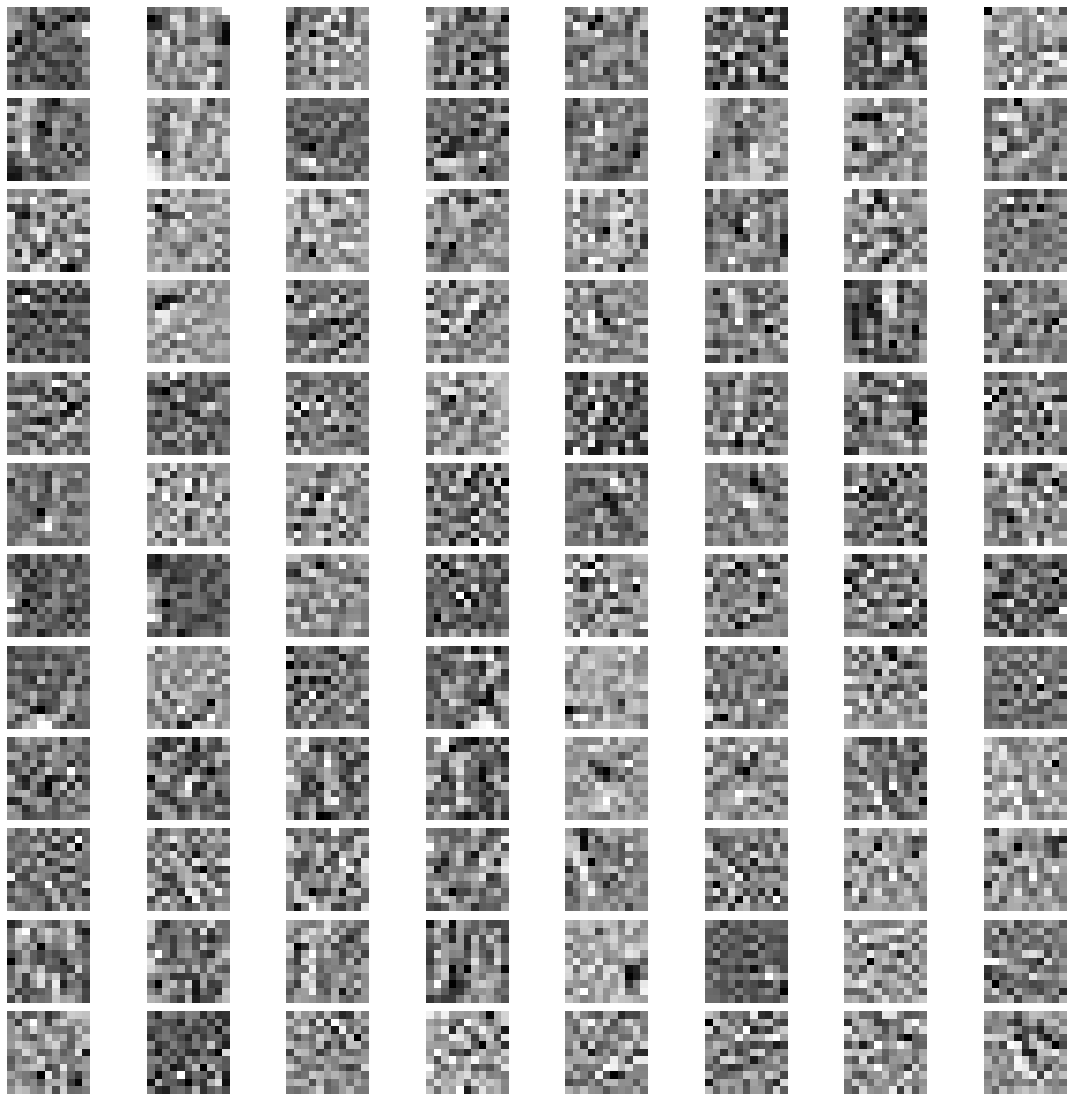

In [4]:
cell_idx = 8
real_kernel = varnet.cell_list[cell_idx].conv_kernel[:,:,:,:,0]
imag_kernel = varnet.cell_list[cell_idx].conv_kernel[:,:,:,:,1]
plt.figure(figsize=(20,20))
for i in range(48):
    kernel_idx = i
    re_kernel = real_kernel[kernel_idx].detach().numpy()
    im_kernel = imag_kernel[kernel_idx].detach().numpy()
    plt.subplot(12,8,2*i+1)
    plt.imshow(np.squeeze(re_kernel)/np.max(re_kernel),cmap='gray')
    plt.axis('off')
    plt.subplot(12,8,2*i+2)
    plt.imshow(np.squeeze(im_kernel/np.max(im_kernel)),cmap='gray')
    plt.axis('off')
plt.subplots_adjust(hspace=0.1, wspace=0)


# Visualizing activation function

Text(0.5, 1.0, 'potential function')

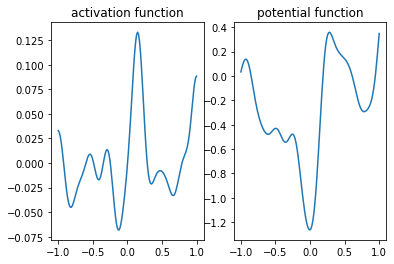

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# visualize activation
cell_idx = 0
channel = 20

w = (varnet.cell_list[cell_idx].activation.w).detach().cpu().numpy()

num_act_weights = w.shape[-1]
x = np.linspace(-1,1,151,dtype=np.float32)
mu = np.linspace(-1,1,num_act_weights,dtype=np.float32)
sigma = 2/(num_act_weights - 1)

out = np.zeros_like(x.shape, dtype=np.float32)
for i in range(num_act_weights):
    out = out + w[:,channel,:,:,i]*np.exp(-np.square(x - mu[i])/(2*sigma**2))

plt.subplot(1,2,1); plt.plot(x,np.squeeze(out)); plt.title('activation function')
plt.subplot(1,2,2); plt.plot(x,np.cumsum(np.squeeze(out))); plt.title('potential function')